This notebook demonstrates the use of PmagPy functions from within a  Jupyter notebook in parallel with the PmagPy cookbook http://earthref.org/PmagPy/cookbook.

It is meant to function from within the PmagPy data_files/notebooks directory and calls are relative to that.  

First, we import the pmagpy modules, **pmagplotlib**, **pmag** and **ipmag** and some other handy funcions for use in the notebook.

In [87]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
from importlib import reload
reload(pmag)
reload(ipmag)
reload(continents);

## angle

There are several ways to use this from the notebook - one loading the data into a Pandas dataframe, then convert to the desired arrays, or load directly into a Numpy array of desired shape.  

In [2]:
help(pmag.angle)

Help on function angle in module pmagpy.pmag:

angle(D1, D2)
    Calculate the angle between two directions.
    
    Parameters
    ----------
    D1 : Direction 1 as an array of [declination, inclination] pair or pairs
    D2 : Direction 2 as an array of [declination, inclination] pair or pairs
    
    Returns
    -------
    angle : angle between the directions as a single-element array
    
    Examples
    --------
    >>> pmag.angle([350.0,10.0],[320.0,20.0])
    array([ 30.59060998])



In [48]:
# Pandas way:
di=pd.read_csv('../angle/angle.dat',delim_whitespace=True,header=None)
#rename column headers
di.columns=['Dec1','Inc1','Dec2','Inc2']
# call pmag.angle
pmag.angle(di[['Dec1','Inc1']].values,di[['Dec2','Inc2']].values)

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

In [49]:
# Numpy way:
di=np.loadtxt('../angle/angle.dat').transpose() # read in file
D1=di[0:2].transpose() # assign to first array
D2=di[2:].transpose() # assign to second array
pmag.angle(D1,D2) # call pmag.angle

array([  75.92745193,  119.10251273,  103.65330599,   81.42586582,
        120.1048559 ,  100.8579262 ,   95.07347774,   74.10981614,
         78.41266977,  120.05285684,  114.36156914,   66.30664335,
         85.38356936,   95.07546203,   93.84174   ,   93.116631  ,
        105.39087299,   71.78167883,  104.04746653,   93.84450445,
         93.29827337,   96.34377954,   90.14271929,  112.17559328,
         90.06592091,  120.00493016,   75.31604123,   86.19902246,
         85.85667799,   82.64834934,  115.51261896,   99.28623007,
         65.9466766 ,   90.55185269,   90.50418859,   84.49253198,
         93.00731365,   67.47153733,   76.84279617,   83.80354   ,
        128.3068145 ,   91.690954  ,   46.87441241,  110.66917836,
        103.69699188,   64.35444341,   81.94448359,   94.01817998,
        121.19588845,   83.64445512,  113.72812352,   76.38276774,
        113.38742874,   74.09024232,   79.42493098,   74.92842387,
         90.5556631 ,   91.44844861,  112.71773111,   77.26775

## ani_depthplot
We will use the **ipmag** version of this program which assumes the MagIC data model 3. If you want datamodel 2, just use **ipmag.ani_depthplot2().  

In [16]:
help(ipmag.ani_depthplot)

Help on function ani_depthplot in module pmagpy.ipmag:

ani_depthplot(spec_file='specimens.txt', samp_file='samples.txt', meas_file='measurements.txt', site_file='sites.txt', age_file=None, sum_file=None, fmt='svg', dmin=-1, dmax=-1, depth_scale='core_depth', dir_path='.')
    returns matplotlib figure with anisotropy data plotted against depth
    available depth scales: 'composite_depth', 'core_depth' or 'age' (you must provide an age file to use this option)



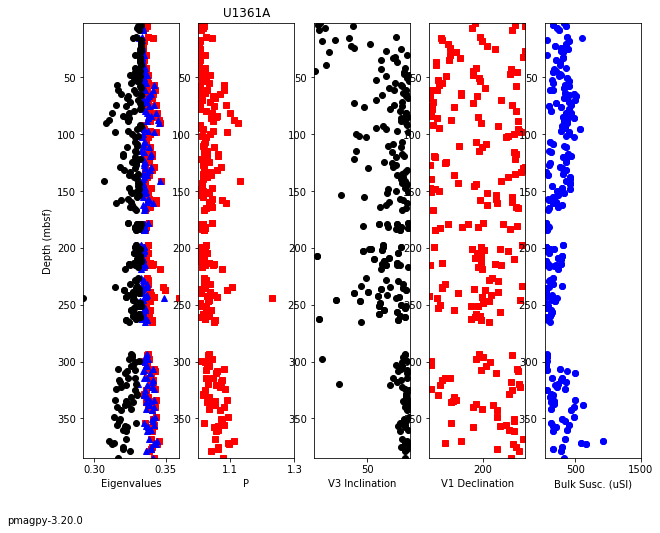

In [17]:
ipmag.ani_depthplot(dir_path='../../data_files/ani_depthplot');

## aniso_magic

Let's try the **ipmag.aniso_magic()** way.  

In [38]:
help(ipmag.aniso_magic)

Help on function aniso_magic in module pmagpy.ipmag:

aniso_magic(infile='specimens.txt', samp_file='samples.txt', site_file='sites.txt', ipar=1, ihext=1, ivec=1, iplot=0, isite=1, iboot=1, vec=0, Dir=[], PDir=[], comp=0, user='', fmt='png', crd='s', verbose=True, plots=0, num_bootstraps=1000, dir_path='.')



In [8]:
# ipmag.aniso_magic doesent work yet.
#ipmag.aniso_magic(infile='sed_specimens.txt',ivec=1,dir_path='../aniso_magic')

## apwp

This program calls the function **pmag.bc02** which returns the pole for the plate for that age.  

apwp.py then does the favor of calling **pmag.vgp_di** to calculate the direction at the desired location (**site_lat** and **site_lon**) and pmag.magnetic_lat() to get the paleolatitude.  

This can all be done directly from within the notebook.


In [25]:
help(pmag.bc02)

Help on function bc02 in module pmagpy.pmag:

bc02(data)
    get APWP from Besse and Courtillot 2002 paper
    
    Parameters
    ----------
    Takes input as [plate, site_lat, site_lon, age]
    plate : string (options: AF, ANT, AU, EU, GL, IN, NA, SA)
    site_lat : float
    site_lon : float
    age : float in Myr
    
    Returns
    ----------
    pole_lat,pole_lon  :  location of pole for plate at that age.



In [32]:
data=['NA',33,-117,100]
pole_lat,pole_lon=pmag.bc02(data)
dec,inc=pmag.vgp_di(pole_lat,pole_lon,data[1],data[2])
paleo_lat=pmag.magnetic_lat(inc)
print (' Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.')
print ('%7.1f %7.1f %7.1f %7.1f %7.1f  %7.1f\n' \
       %(data[3],paleo_lat,dec,inc,pole_lat,pole_lon))


 Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.
  100.0    38.8   352.4    58.1    81.5    198.3



## b_vdm.py

b_vdm.py calls **pmag.b_vdm()** which we can do directly from within the notebook

In [33]:
help(pmag.b_vdm)

Help on function b_vdm in module pmagpy.pmag:

b_vdm(B, lat)
    Converts a magnetic field value (input in units of tesla) to a virtual
    dipole moment (VDM) or a virtual axial dipole moment (VADM; output
    in units of Am^2)
    
    Parameters
    ----------
    B: local magnetic field strength in tesla
    lat: latitude of site in degrees
    
    Returns
    ----------
    V(A)DM in units of Am^2



In [36]:
b,lat=33e-6,22 # field (in tesla), and latitude
pmag.b_vdm(b,lat) # output in Am^2

7.1588159745117882e+22

## biplot_magic 

We can reproduce the plots that biplot_magic make using Pandas.  The key to what measurements mean is in the method codes, so we can first get a unique list of method_codes, then plot one against the other.  Let's read in the data file in to a Pandas dataframe and exctract the method codes: 

In [17]:
meas=pd.read_csv('../biplot_magic/measurements.txt',sep='\t',header=1)
print(meas.method_codes.unique())
meas.head()

,citations,dir_dec,dir_inc,experiment,magn_mass,meas_temp,measurement,method_codes,quality,specimen,standard,susc_chi_mass,treat_ac_field,treat_dc_field,treat_step_num,treat_temp
0,This study,268.5,-41.2,15-1-013:LP-AF-DIR,0.000003,300,15-1-013:LP-AF-DIR-1,LT-AF-Z,g,15-1-013,u,NaN,0.015,0.00000,1.0,300
1,This study,NaN,NaN,15-1-013:LP-ARM,0.000179,300,15-1-013:LP-ARM-2,LT-AF-I,g,15-1-013,u,NaN,0.080,0.00005,2.0,300
2,This study,NaN,NaN,15-1-013:LP-IRM,0.003600,300,15-1-013:LP-IRM-3,LT-IRM,g,15-1-013,u,NaN,0.000,1.00000,3.0,300
3,This study,NaN,NaN,15-1-013:LP-X,NaN,300,15-1-013:LP-X-4,LP-X,NaN,15-1-013,NaN,2.380000e-07,0.010,0.00000,4.0,300
4,This study,181.0,68.6,15-1-022:LP-AF-DIR,0.000011,300,15-1-022:LP-AF-DIR-5,LT-AF-Z,g,15-1-022,u,NaN,0.015,0.00000,5.0,300


These are an AF demag step, an ARM, an IRM and a susceptibility.  Now we can fish out data for each method, merge them by specimen, dropping any missing measurements and plot one against the other.  

In [34]:
IRM=meas[meas.method_codes.str.contains('LT-IRM')]
IRM=IRM[['specimen','magn_mass']]
IRM.columns=['specimen','IRM']
ARM=meas[meas.method_codes.str.contains('LT-AF-I')]
ARM=ARM[['specimen','magn_mass']]
ARM.columns=['specimen','ARM']
CHI=meas[meas.method_codes.str.contains('LP-X')]
CHI=CHI[['specimen','susc_chi_mass']]  
CHI.columns=['specimen','CHI']
RMRMs=pd.merge(IRM,ARM,on='specimen')
RMRMs=pd.merge(RMRMs,CHI,on='specimen')

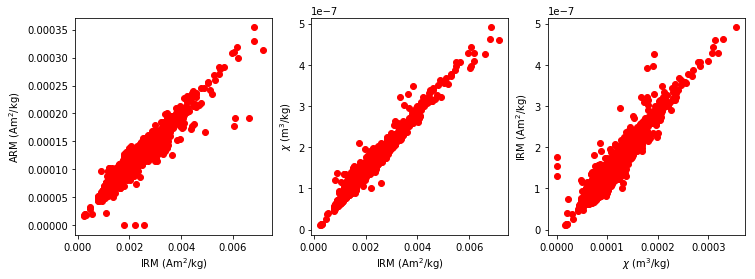

In [37]:
fig=plt.figure(1, (12,4))
fig.add_subplot(131)
plt.plot(RMRMs.IRM,RMRMs.ARM,'ro')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('ARM (Am$^2$/kg)')
fig.add_subplot(132)
plt.plot(RMRMs.IRM,RMRMs.CHI,'ro')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('$\chi$ (m$^3$/kg)')
fig.add_subplot(133)
plt.plot(RMRMs.ARM,RMRMs.CHI,'ro')
plt.xlabel('$\chi$ (m$^3$/kg)')
plt.ylabel('IRM (Am$^2$/kg)');

## cart_dir
cart_dir.py calls pmag.cart2dir()  which we can call directly from the notebook

In [10]:
help(pmag.cart2dir)

Help on function cart2dir in module pmagpy.pmag:

cart2dir(cart)
    Converts a direction in cartesian coordinates into declination, inclinations
    
    Parameters
    ----------
    cart : input list of [x,y,z]
    
    Returns
    -------
    direction_array : returns an array of [declination, inclination, intensity]
    
    Examples
    --------
    >>> pmag.cart2dir([0,1,0])
    array([ 90.,   0.,   1.])



In [13]:
# read in data file from example file
cart=np.loadtxt('../cart_dir/cart_dir_example.dat')
print ('Input: \n',cart)
print ('Output: \n',pmag.cart2dir(cart))

Input: 
 [[ 0.3971 -0.1445  0.9063]
 [-0.5722  0.04   -0.8192]]
Output: 
 [[ 340.00415104   65.00211761    0.99997417]
 [ 176.00120788  -55.00063858    1.00005074]]


## chi_magic.py 
chi_magic.py reads in a MagIC data model 2.5 file, and makes various plots.  ../chi_magic/measurements.txt has bee upgraded to  We can reproduce these with Pandas...  

In [38]:
# read in data from data model 3 example file
chi_data=pd.read_csv('../chi_magic/measurements.txt',sep='\t',header=1)
print (chi_data.columns)
# get arrays of available temps, frequencies and fields
Ts=np.sort(chi_data.meas_temp.unique())
Fs=np.sort(chi_data.meas_freq.unique())
Bs=np.sort(chi_data.meas_field_ac.unique())


Index(['citations', 'experiment', 'instrument_codes', 'meas_field_ac',
       'meas_freq', 'meas_temp', 'method_codes', 'specimen',
       'susc_chi_qdr_volume', 'susc_chi_volume', 'timestamp'],
      dtype='object')


0.0003


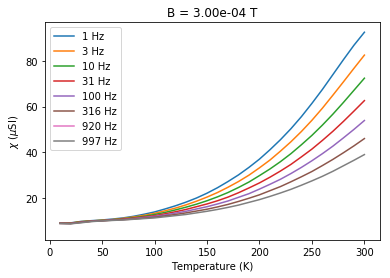

In [40]:
# plot chi versus temperature at constant field
b=Bs.max()
for f in Fs:
    this_f=chi_data[chi_data.meas_freq==f]
    this_f=this_f[this_f.meas_field_ac==b]
    plt.plot(this_f.meas_temp,1e6*this_f.susc_chi_volume,label='%i'%(f)+' Hz')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

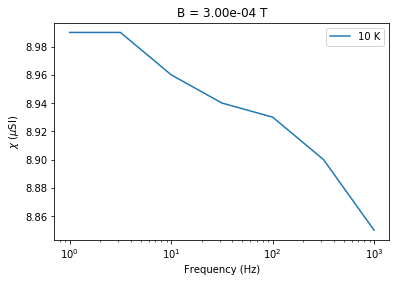

In [47]:
# plot chi versus frequency at constant B
b=Bs.max()
t=Ts.min()
this_t=chi_data[chi_data.meas_temp==t]
this_t=this_t[this_t.meas_field_ac==b]
plt.semilogx(this_t.meas_freq,1e6*this_t.susc_chi_volume,label='%i'%(t)+' K')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T');

## common_mean
ipmag.common_mean_bootrap does the same job as the command line program common_mean.py 

In [50]:
help(ipmag.common_mean_bootstrap)

Help on function common_mean_bootstrap in module pmagpy.ipmag:

common_mean_bootstrap(Data1, Data2, NumSims=1000, save=False, save_folder='.', fmt='svg', figsize=(7, 2.3), x_tick_bins=4)
    Conduct a bootstrap test (Tauxe, 2010) for a common mean on two declination,
    inclination data sets. Plots are generated of the cumulative distributions
    of the Cartesian coordinates of the means of the pseudo-samples (one for x,
    one for y and one for z). If the 95 percent confidence bounds for each
    component overlap, the two directions are not significantly different.
    
    Parameters
    ----------
    Data1 : a nested list of directional data [dec,inc] (a di_block)
    Data2 : a nested list of directional data [dec,inc] (a di_block)
    NumSims : number of bootstrap samples (default is 1000)
    save : optional save of plots (default is False)
    save_folder : path to directory where plots should be saved
    fmt : format of figures to be saved (default is 'svg')
    figsize : 

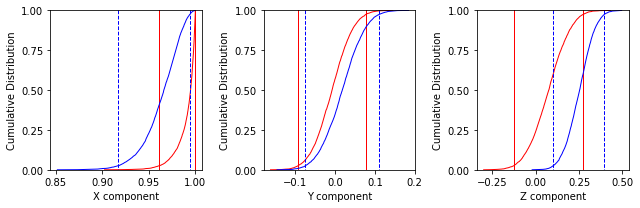

In [187]:
directions_A=np.loadtxt('../common_mean/common_mean_ex_file1.dat')
directions_B=np.loadtxt('../common_mean/common_mean_ex_file2.dat') 
ipmag.common_mean_bootstrap(directions_A,directions_B,figsize=(9,3))

## cont_rot 
This program reads in the outlines of continents from **continents.get_cont()**, rotates around a rotation pole and angle as specified by the age  and continent in question (from **frp.get_pole()** using **pmag.ptROT()**.  It then plots them using basemap in **pmagplotlib.plotMAP()** (or **pmagplotlib.plot_map** for cartopy version.  Here will will reproduce it more directly through the notebook.  

In [191]:
# load in the continents module
import pmagpy.continents as continents
import pmagpy.frp as frp
help(continents.get_continent)

Help on function get_continent in module pmagpy.continents:

get_continent(continent)
    get_continent(continent)
    returns the outlines of specified continent.
    
    Parameters:
    ____________________
    continent:
        af : Africa
        congo : Congo
        kala : Kalahari
        aus : Australia
        balt : Baltica
        eur : Eurasia
        ind : India
        sam : South America
        ant : Antarctica
        grn : Greenland
        lau : Laurentia
        nam : North America
        gond : Gondawanaland
    Returns : 
        array of [lat/long] points defining continent



In [190]:
help(pmagplotlib.plotMAP)

Help on function plotMAP in module pmagpy.pmagplotlib:

plotMAP(fignum, lats, lons, Opts)
    plotMAP(fignum, lats,lons,Opts)
    makes a basemap with lats/lons
        Windows 10 users, see plot_map
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options: 
        Opts.keys=
            latmin : minimum latitude for plot
            latmax : maximum latitude for plot
            lonmin : minimum longitude for plot
            lonmax : maximum longitude
            lat_0 : central latitude
            lon_0 : central longitude
            proj : projection [basemap projections, e.g., moll=Mollweide, merc=Mercator, ortho=orthorhombic,
                lcc=Lambert Conformal]
            sym : matplotlib symbol
            symsize : symbol size in pts
            pltgrid : plot the grid [1,0]
            res :  resolution [c,l,i,h] for crude, low, interme

/Users/ltauxe/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


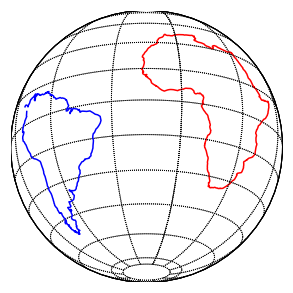

In [196]:
# retrieve continental outline
af=continents.get_continent('af').transpose()
sam=continents.get_continent('sam').transpose()


#define options for pmagplotlib.plotMAP
plt.figure(1,(5,5))
Opts = {'latmin': -90, 'latmax': 90, 'lonmin': 0., 'lonmax': 360., 'lat_0': -20, \
            'lon_0': 345,'proj': 'ortho', 'sym': 'r-', 'symsize': 3,\
            'pltgrid': 0, 'res': 'c', 'boundinglat': 0.}
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam[0],sam[1],Opts)

Now for the rotation part.  These are in a function called frp.get_pole()

In [193]:
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    get_pole(continent,age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters:
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Outputs:
          returns  [pole longitude, pole latitude, rotation angle] for the continent at specified age



In [194]:
# get the rotation pole for south america relative to South Africa at 180 Ma
sam_pole=frp.get_pole('sam',180)
# NB: for african rotations, first rotate other continents to fixed Africa, then 
# rotate with South African pole (saf)


The rotation is done by pmag.PTrot.

In [195]:
help(pmag.PTrot)

Help on function PTrot in module pmagpy.pmag:

PTrot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated



so here we go...  

/Users/ltauxe/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


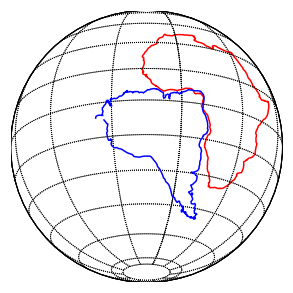

In [200]:
plt.figure(1,(5,5))
sam_rot=pmag.PTrot(sam_pole,sam[0],sam[1]) # same for south america
# and plot 'em
Opts['sym']='r-'
pmagplotlib.plotMAP(1,af[0],af[1],Opts)
Opts['sym']='b-'
pmagplotlib.plotMAP(1,sam_rot[0],sam_rot[1],Opts)

In [225]:
!convert_samples.py -h


    NAME
        convert_samples.py
   
    DESCRIPTION
        takes an er_samples or magic_measurements format file and creates an orient.txt template
 
    SYNTAX
        convert_samples.py [command line options]

    OPTIONS
        -f FILE: specify input file, default is er_samples.txt
        -F FILE: specify output file, default is: orient_LOCATION.txt 

    INPUT FORMAT
        er_samples.txt or magic_measurements format file
    OUTPUT
        orient.txt format file
    


## core_depthplot

This can be done using the wonders of Pandas data frames using the data_model 3 data in the example data file folder.  


Let's do things this way:
- read in the data from the sites and specimens files.
- Drop the records with NaN for analysts, keeping one of the three lines available for each specimen. 
- Make a new column named **site** in the specdimens table that is the same as the **specimen** column.
- (this makes sense because these are core data, so the specimen=sample=site. )
- Merge the two DataFrames on the **site** column.
- Plot **dir_inc** versus **core_depth**.  
- Put on GAD field inclination
- plot the time scale

In [268]:
sites=pd.read_csv('../core_depthplot/sites.txt',sep='\t',header=1)
specimens=pd.read_csv('../core_depthplot/specimens.txt',sep='\t',header=1)
specimens=specimens.dropna(subset=['analysts']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site
lat=sites.site_lat.unique()[0]


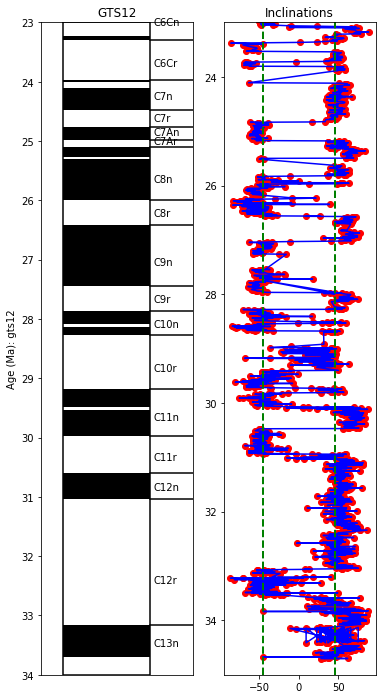

In [271]:
fig=plt.figure(1,(6,12))
ax=fig.add_subplot(121)
pmagplotlib.plot_ts(ax,23,34,timescale='gts12')
ax1=fig.add_subplot(122)
plt.plot(data.dir_inc,data.age,'ro')
plt.plot(data.dir_inc,data.age,'b-')
plt.ylim(35,23)
#plt.ylabel('Age (Ma)')
gad=np.degrees(np.arctan(2.*np.tan(np.radians(lat)))) # tan (I) = 2 tan (lat)
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations');

